In [1]:
from keras.applications import vgg16

Using TensorFlow backend.


In [2]:
model=vgg16.VGG16(weights='imagenet' , include_top=False , input_shape=(224,224,3) )

model.layers[0].input

In [3]:
model.layers[0].input

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 3) dtype=float32>

In [4]:
for  layer in model.layers:
    layer.trainable = False

In [5]:
model.layers

In [6]:
model.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [7]:
top_model=model.output

In [8]:
top_model

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [10]:
top_model = Flatten(name = 'flatten')(top_model)
#top_model = Dense(1024, activation='relu')(top_model)
top_model = Dense(512, activation='relu')(top_model)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dense(124, activation='relu')(top_model)
top_model = Dense(62, activation='relu')(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(units=1, activation='sigmoid')(top_model)

In [11]:
top_model

<tf.Tensor 'dense_5/Sigmoid:0' shape=(None, 1) dtype=float32>

In [12]:
from keras.models import Model

In [13]:
new_model=Model( inputs= model.input , outputs=top_model)

In [ ]:
Image.open(1.jpg)

In [14]:
new_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [15]:
from keras_preprocessing.image import ImageDataGenerator

In [16]:
new_model.compile(optimizer= 'Adam' , loss ='binary_crossentropy' , metrics=['accuracy'])

In [17]:
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'testing/himanshu_set/train/',
        target_size=(224,224),
        batch_size=6,
        class_mode='binary')

#for images in training_set:
 #   images=image.img_to_array(images)
  #  images=np.expand_dims(images,axis=0)
    #images=np.expand_dims(images,axis=0)

test_set = test_datagen.flow_from_directory(
        'testing/himanshu_set/test/',
        target_size=(224,224),
       batch_size=6,
        class_mode='binary')
#/for images in test_set:
    #images=image.img_to_array(images)
    #images=np.expand_dims(images,axis=0)
    #images=np.expand_dims(images,axis=0)
    
new_model.fit(
        training_set,  
    
        steps_per_epoch= 2175,
        epochs=2,
        #callbacks = callbacks,
        validation_data=test_set,
  
    
    
     validation_steps=138)
        
new_model.save_weights('mymodel.h5')


Found 2175 images belonging to 1 classes.
Found 138 images belonging to 1 classes.
Epoch 1/2
2175/2175 [==============================] - 10817s 5s/step - loss: 4.5697e-04 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/2
2175/2175 [==============================] - 11604s 5s/step - loss: 9.2026e-13 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [65]:
from keras.preprocessing import image

In [105]:
test_image = image.load_img('C:/Users/hp19tu/Desktop/cv/testing/himanshu_set/test/himanshu/44.jpg', 
               target_size=(224,224))

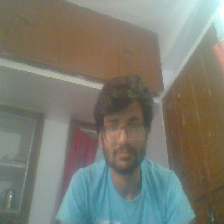

In [106]:
test_image

In [93]:
test_image = image.img_to_array(test_image)

In [94]:
import numpy as np 

In [95]:
test_image = np.expand_dims(test_image, axis=0)

In [96]:
result = new_model.predict(test_image)

In [97]:
result

array([[0.]], dtype=float32)